In [1]:
from scipy import interpolate
from scipy.interpolate import interp1d

In [2]:

x_points = [ 0, 1, 2, 3, 4, 5]
y_points = [12,14,22,39,58,77]

In [3]:
tck = interpolate.splrep(x_points, y_points, k=2)

In [4]:
tck

(array([0. , 0. , 0. , 1.5, 2.5, 3.5, 5. , 5. , 5. ]),
 array([12.        , 11.51654412, 20.62806373, 38.89276961, 62.79595588,
        77.        ,  0.        ,  0.        ,  0.        ]),
 2)

In [5]:
?interpolate.splrep

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
x = np.linspace(0, 10, num=11, endpoint=True)

In [8]:
y = np.cos(-x**2/9.0)

In [9]:
f = interp1d(x, y)

In [10]:
f

In [11]:
f2 = interp1d(x, y, kind='cubic')

In [12]:
xnew = np.linspace(0, 4, num=41, endpoint=True)

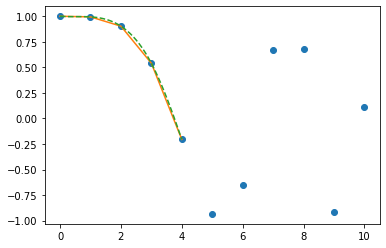

In [13]:
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')

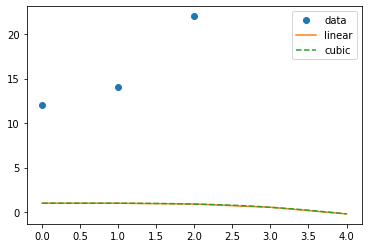

In [22]:
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')

In [23]:
f2.__dict__

{'bounds_error': True,
 'copy': True,
 'axis': 0,
 'y': array([ 1.        ,  0.99383351,  0.90284967,  0.54030231, -0.20550672,
        -0.93454613, -0.65364362,  0.6683999 ,  0.67640492, -0.91113026,
         0.11527995]),
 '_y': array([[ 1.        ],
        [ 0.99383351],
        [ 0.90284967],
        [ 0.54030231],
        [-0.20550672],
        [-0.93454613],
        [-0.65364362],
        [ 0.6683999 ],
        [ 0.67640492],
        [-0.91113026],
        [ 0.11527995]]),
 'x': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 '_kind': 'spline',
 '_fill_value_below': array([nan]),
 '_fill_value_above': array([nan]),
 '_extrapolate': False,
 '_fill_value_orig': array(nan),
 '_spline': <scipy.interpolate._bsplines.BSpline at 0x280849d9c08>,
 '_call': <function scipy.interpolate.interpolate.interp1d._call_spline(self, x_new)>}

In [24]:
f2.c

AttributeError: 'interp1d' object has no attribute 'c'

In [27]:
from scipy.interpolate import CubicSpline, CubicHermiteSpline

# calculate 5 natural cubic spline polynomials for 6 points
# (x,y) = (0,12) (1,14) (2,22) (3,39) (4,58) (5,77)
x = np.array([0, 1, 2])
y = np.array([12,14,22])

# calculate natural cubic spline polynomials
cs = CubicSpline(x,y,bc_type='natural')

# show values of interpolation function at x=1.25
print('S(1.25) = ', cs(1.25))

## Aditional - find polynomial coefficients for different x regions

# if you want to print polynomial coefficients in form
# S0(0<=x<=1) = a0 + b0(x-x0) + c0(x-x0)^2 + d0(x-x0)^3
# S1(1< x<=2) = a1 + b1(x-x1) + c1(x-x1)^2 + d1(x-x1)^3
# ...
# S4(4< x<=5) = a4 + b4(x-x4) + c5(x-x4)^2 + d5(x-x4)^3
# x0 = 0; x1 = 1; x4 = 4; (start of x region interval)

# show values of a0, b0, c0, d0, a1, b1, c1, d1 ...
cs.c

# Polynomial coefficients for 0 <= x <= 1
a0 = cs.c.item(3,0)
b0 = cs.c.item(2,0)
c0 = cs.c.item(1,0)
d0 = cs.c.item(0,0)

# Polynomial coefficients for 1 < x <= 2
a1 = cs.c.item(3,1)
b1 = cs.c.item(2,1)
c1 = cs.c.item(1,1)
d1 = cs.c.item(0,1)

# ...


# Print polynomial equations for different x regions
print('S0(0<=x<=1) = ', a0, ' + ', b0, '(x-0) + ', c0, '(x-0)^2  + ', d0, '(x-0)^3')
print('S1(1< x<=2) = ', a1, ' + ', b1, '(x-1) + ', c1, '(x-1)^2  + ', d1, '(x-1)^3')
print('...')

# So we can calculate S(1.25) by using equation S1(1< x<=2)
print('S(1.25) = ', a1 + b1*0.25 + c1*(0.25**2) + d1*(0.25**3))

S(1.25) =  15.5078125
S0(0<=x<=1) =  12.0  +  0.5 (x-0) +  0.0 (x-0)^2  +  1.5 (x-0)^3
S1(1< x<=2) =  14.0  +  5.0 (x-1) +  4.500000000000002 (x-1)^2  +  -1.5000000000000018 (x-1)^3
...
S(1.25) =  15.5078125


In [28]:
cs.c

array([[ 1.5, -1.5],
       [ 0. ,  4.5],
       [ 0.5,  5. ],
       [12. , 14. ]])

In [79]:
tangents = np.array([
    10, 0
])

t = np.array([0, 1])
x = np.array([0, 10])

In [80]:
hermitex = CubicHermiteSpline(t, x, tangents)

In [81]:
tangents = np.array([
   0,  -20
])

t = np.array([0,  1])
y = np.array([0, -10])
hermitey = CubicHermiteSpline(t, y, tangents)

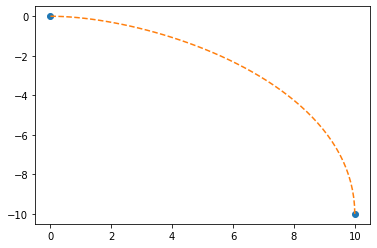

In [82]:

tnew = np.linspace(0,1, 50)

plt.plot( x, y, 'o', hermitex(tnew), hermitey(tnew), '--')

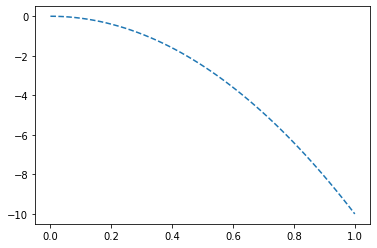

In [78]:
tnew = np.linspace(0,1, 50)
plt.plot( tnew, hermitey(tnew), '--')

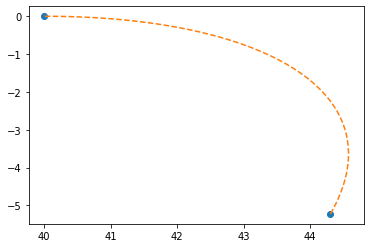

In [97]:
tangentX = np.array([
    3.09016992482654, -10.0
])

t = np.array([0, 1])
x = np.array([44.30602949438151, 40.0])
y = np.array([-5.223206854241455, 0.0])
hermitex = CubicHermiteSpline(t, x, tangentX)

tangentY = np.array([
   9.51056516909997, 1.2246467991473533e-15
])
hermitey = CubicHermiteSpline(t, y, tangentY)

tnew = np.linspace(0,1, 50)
plt.plot( x, y, 'o', hermitex(tnew), hermitey(tnew), '--')

In [95]:
hermitex.c

array([[ 10.],
       [-20.],
       [  0.],
       [ 10.]])

In [93]:
hermitey.c.flatten()

array([  0., -10.,  20., -10.])

In [94]:
hermitey.c

array([[  0.],
       [-10.],
       [ 20.],
       [-10.]])